In [1]:
import sys 
sys.path.append('../../')
sys.path.append('../../../')

from utils.counting_utils import * 
from utils.plotting_utils import * 

base_params = {
    'C':2,
    'C_1':0,
    'eps':0.01,
    'max_num_train_pts':200,
    'max_num_val_pts':4000,
    'seed_frac':0.2,
    'query_batch_frac':0.05,
    'method':'active_labeling'
}

root_pfx = '../../outputs/unit_ball_runs_1'

lst_outs = get_all_outs_for_exp(root_pfx)


In [2]:

lst_n_q      = [100,150,200,250,300,400,500,600,700,800,900,1000]
out = get_numbers_for_param(lst_outs,base_params,'max_num_train_pts',lst_n_q)
df = pd.DataFrame(out)

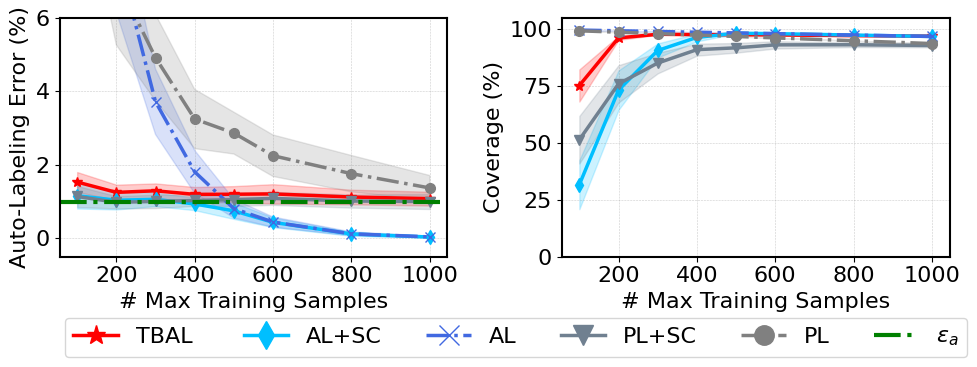

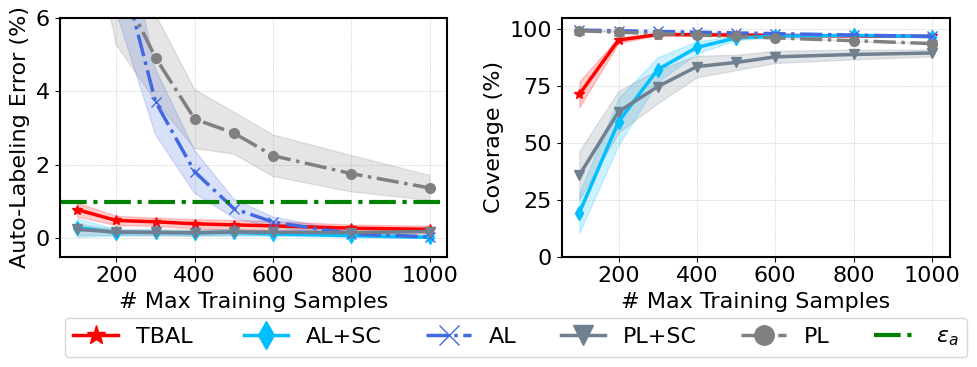

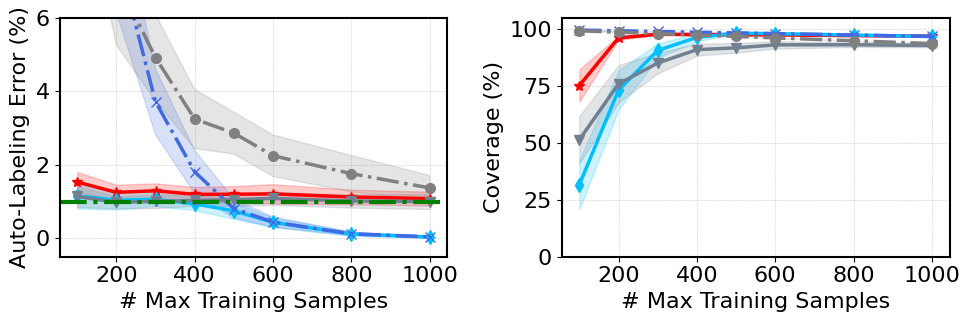

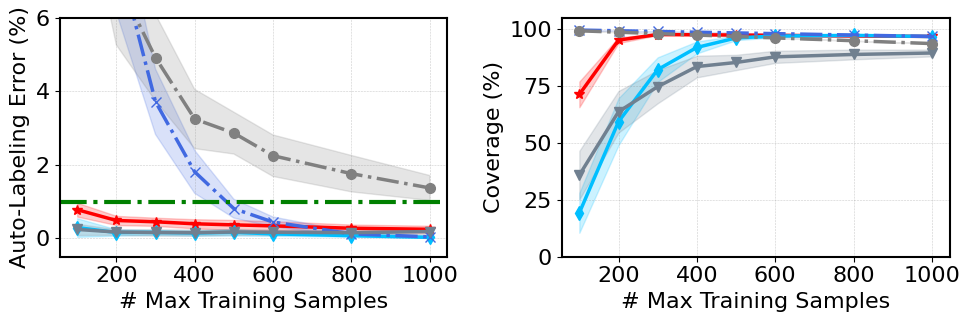

In [3]:
#lst_n_q      = [100,150,200,250,300,400,500,600,700,800,900,1000]

lst_n_q      = [100,150,200,250,300,400,500,600,700,800,900,1000]
lst_n_q      = [100,200,300,400,500,600,800,1000]
lst_n_val     = [4000]

xticks = [200,400,600,800,1000] 
xtick_lbls = [200,400,600,800,1000]
#xticks = ['4K', '5K','6K','7K','8K','9K']

base_params['max_num_val_pts'] = lst_n_val[0]
eps = 0.01
c1 = 0
base_params['C_1'] = c1
base_params['eps'] = eps 

out = get_numbers_for_param(lst_outs,base_params,'max_num_train_pts',lst_n_q)
df = pd.DataFrame(out)

plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.5


lgd=False
for lgd in [True,False]:
    for c1 in [0,0.25]:
        base_params['C_1'] = c1
        base_params['eps'] = eps 

        out = get_numbers_for_param(lst_outs,base_params,'max_num_train_pts',lst_n_q)
        df = pd.DataFrame(out)

        save_path =f"../../outputs/plots/unitball_n_q_eps_{eps}_c1_{c1}_nv_{base_params['max_num_val_pts']}_lgd_{lgd}.pdf"
        #title = f'Error Threshold = {eps*100}% , UCB $C_1$={c1}'
        title =None 
        plot(save_path,out,lst_n_q,'# Max Training Samples',eps=eps,x_ticks=xticks,
            xtick_lbls = xtick_lbls, title=title,figsize=(10,3.5),legend=lgd,
            y_low_1=-0.5,
             y_up_1= 6,
             y_low_2=0,
            y_up_2=105)


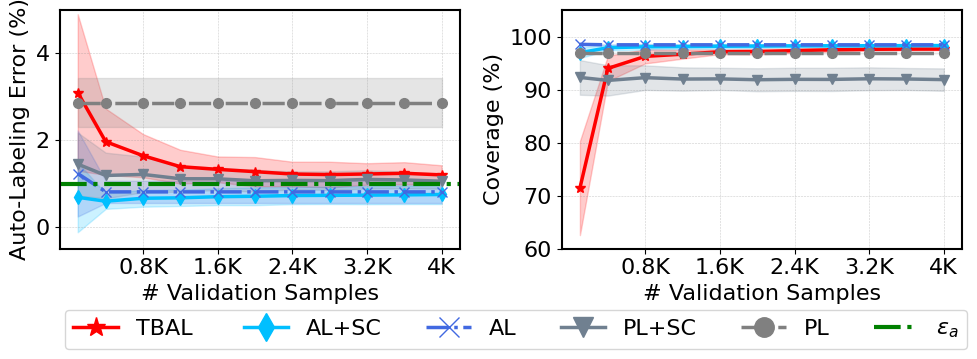

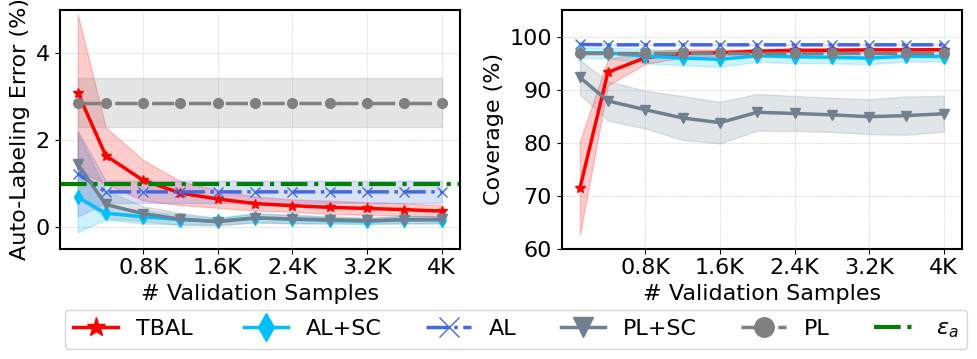

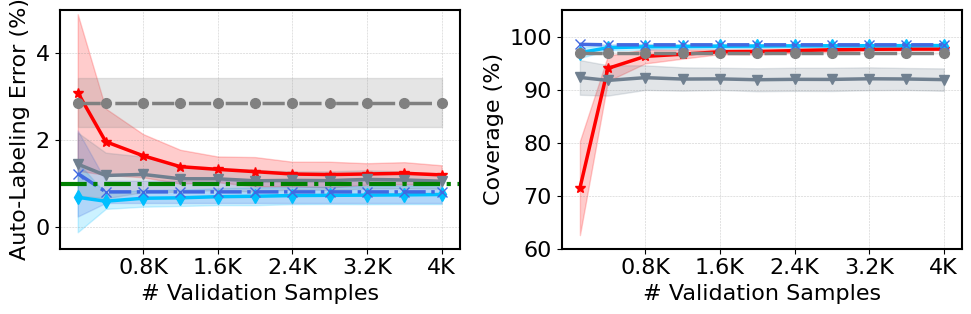

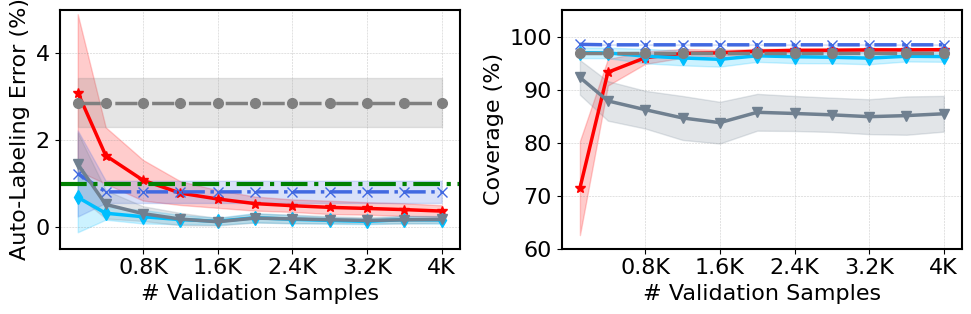

In [6]:
#lst_n_q      = [100,150,200,250,300,400,500,600,700,800,900,1000]

lst_n_q      = [500]
base_params['max_num_train_pts'] = lst_n_q[0]
base_params['C_1'] = 0

#lst_n_val    = [100,400,800,1200,1600,2000,2400,2800] 
lst_n_val = [100,400,800,1200,1600,2000,2400,2800,3200,3600,4000]


xticks = [800,1600,2400,3200,4000]
xtick_lbls = ["0.8K","1.6K",'2.4K','3.2K','4K'] 
#xticks = ['4K', '5K','6K','7K','8K','9K']

base_params['max_num_train_pts'] = lst_n_q[0]
eps = 0.01
c1 = 0.25
base_params['C_1'] = c1
base_params['eps'] = eps 

out = get_numbers_for_param(lst_outs,base_params,'max_num_val_pts',lst_n_val)
df = pd.DataFrame(out)

plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.5

lgd=True

#title = f'Error Threshold = {eps*100}% , UCB $C_1$={c1}'
title =None 

for lgd in [True,False]:
    for c1 in [0,0.25]:
        base_params['C_1'] = c1
        base_params['eps'] = eps 

        out = get_numbers_for_param(lst_outs,base_params,'max_num_val_pts',lst_n_val)
        df = pd.DataFrame(out)
        save_path =f"../../outputs/plots/unitball_val_eps_{eps}_c1_{c1}_nq_{base_params['max_num_train_pts']}_'lgd_{lgd}_2'.pdf"
        #title = f'Error Threshold = {eps*100}% , UCB $C_1$={c1}'
        title =None 

        plot(save_path,out,lst_n_val,'# Validation Samples',eps=eps,
          x_ticks=xticks, xtick_lbls = xtick_lbls, title=title,figsize=(10,3.5),
          legend=lgd,
          y_low_1=-0.5,
          y_up_1= 5,
          y_low_2=60,
          y_up_2=105)